## Exercise 10.1

In questo esercizio ho deciso di parallelizzare l'algoritmo sviluppato nell'esercitazione 9 utlizzando la libreria MPI. L'idea è quella di utilizzare un unico main, eseguito da diversi processi in parallelo, i quali considerano dati differenti tra di loro. 

Una semplice parallelizzazione aumenta il numero di simulazioni compiute contemporaneamente. Tuttavia, finchè questi processi non si parlano, non può esserci alcun modo in cui questi possano velocizzare globalmente la simulazione. Per questo, ogni 5 generazioni ho implementato una migrazione: tra i vari processi in atto ne vengono scelti causalmente due e i migliori individui delle due popolazioni corrispondenti ai due processi vengono tra di loro scambiati. Nel linguaggio degli algoritmi genetici questi processi paralleli vengono detti "continenti", proprio perché ospitano popolazioni che evolvono indipendentemente e che solo ogni tanto vengono in contatto e si scambiano materiale genetico.

Rispetto alle funzioni sviluppate nell'esercizio 9 ho dovuto modificare l'inizializzatore dei numeri casuali, in modo che in base al processo leggesse righe diverse dal file dei numeri primi, e generasse così sequenze di numeri casuali diverse per ogni continente. Ho anche modificato le funzioni di stampa in modo che distinguessero la fitness di processi diversi e la stampassero in diversi file.

## Exercise 10.2

Applichiamo la parallelizzazione del codice che risolve il TSP e confrontiamo la soluzione senza migrazioni rispetto alla soluzione con migrazioni. In questo caso abbiamo considerato le 50 capitali deglli Stati Uniti, comprese Alaska e Hawaii. Sono state generate popolazioni da 3000 cromosomi e i parametri di evoluzione sono simili a quelli sperimentati nell'esercizio 9:

1. Parametro selezione $p=3.0$
2. Proababilità Crossover $P_c=0.5$
3. Probabilità permutazione coppia $P_p=0.15$
4. Probabilità di shift $P_s=0.1$
5. Probabilità permutazione gruppo $P_{pg}=0.1$
6. Probabilità di inversione $P_i=0.1$

Abbiamo usato 4 nodi in entrambi i casi: partiamo dalla simulazione senza migrazioni.

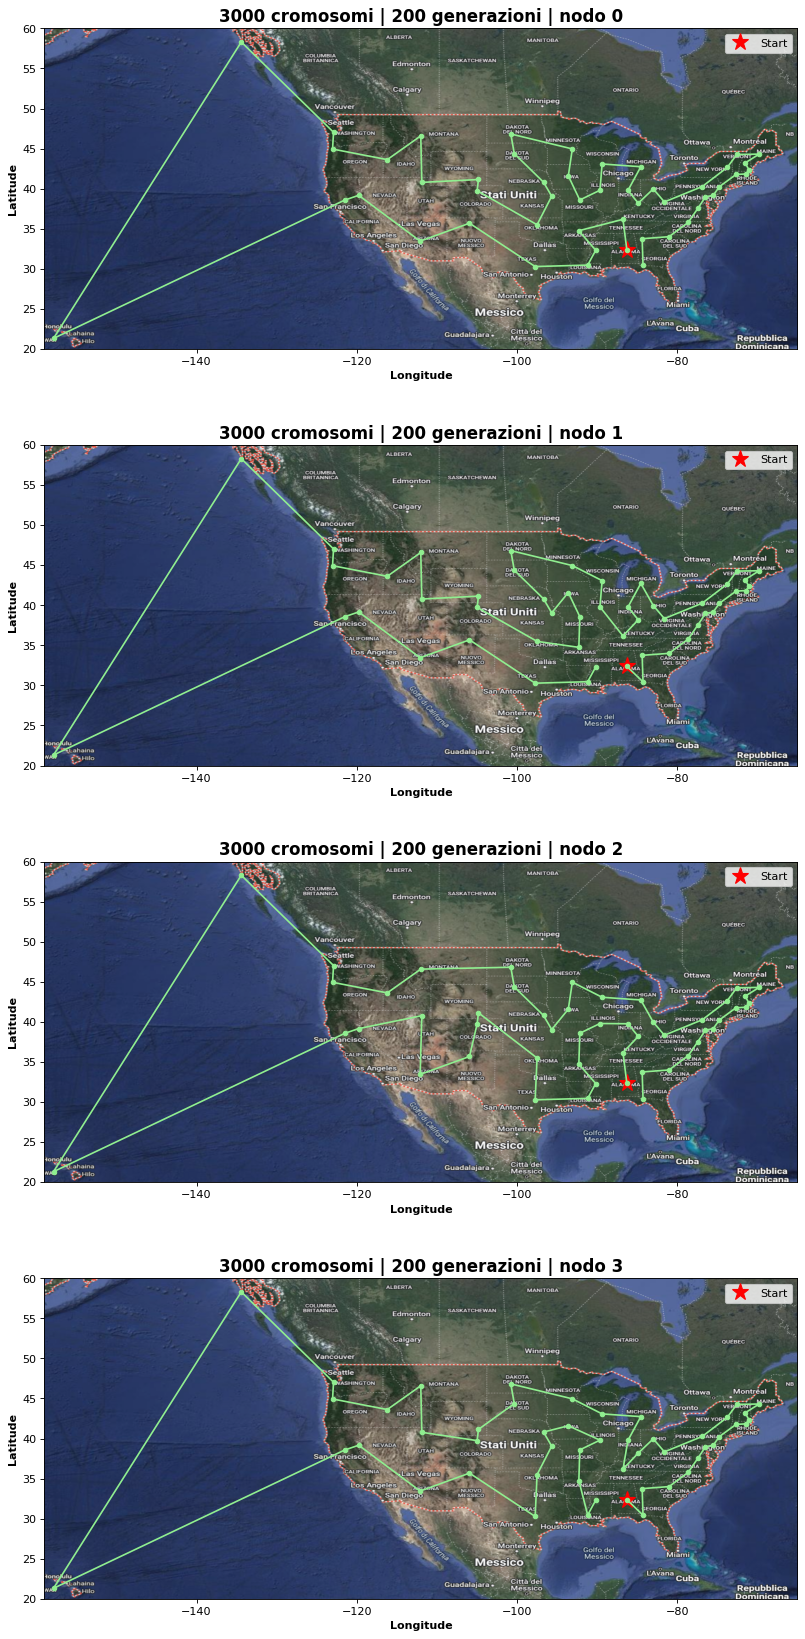

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
import matplotlib.image as mpimg


figure(figsize=(20, 26), dpi=80)

proc_index = ['0', '1', '2', '3']

for i in range (0,4):
    
    plt.subplot(4,1,i+1)
    map_img = mpimg.imread("us.png")  # Replace "us_map.png" with the path to your map image
    plt.imshow(map_img, extent=[-159, -64, 17, 65])
    x,y = np.loadtxt("c++/output/NoMigrations/Cities"+proc_index[i]+"/Output.gen200.txt", usecols=(0,1), unpack='true')
    plt.plot(x[0],y[0], marker ="*", color = "red", markersize = 16, label = "Start", linestyle = "")
    plt.plot(x, y, marker = "o",color="lightgreen", markersize = 4, linestyle = "-")
    plt.ylabel('Latitude', fontsize = 10, fontweight = "bold")
    plt.xlabel('Longitude', fontsize = 10, fontweight = "bold")
    plt.title('3000 cromosomi | 200 generazioni | nodo '+proc_index[i], fontsize = 15, fontweight = "bold")
    plt.legend()

    rectangle = plt.Rectangle((0,0), 1, 1, fc='r', alpha = 0.15)
    plt.gca().add_patch(rectangle)

    plt.xlim(-159, -65)
    plt.ylim(20, 60)
    plt.gca().set_aspect('equal', adjustable='box')

plt.subplots_adjust(hspace=0.3)
plt.show()

Abbiamo ottenuto quattro diversi percorsi, a visti tutti abbastanza buoni, che risolvono in modo leggermente diverso la zona CT (Central time zone). Vediamo ora la fitness dei vari percorsi:

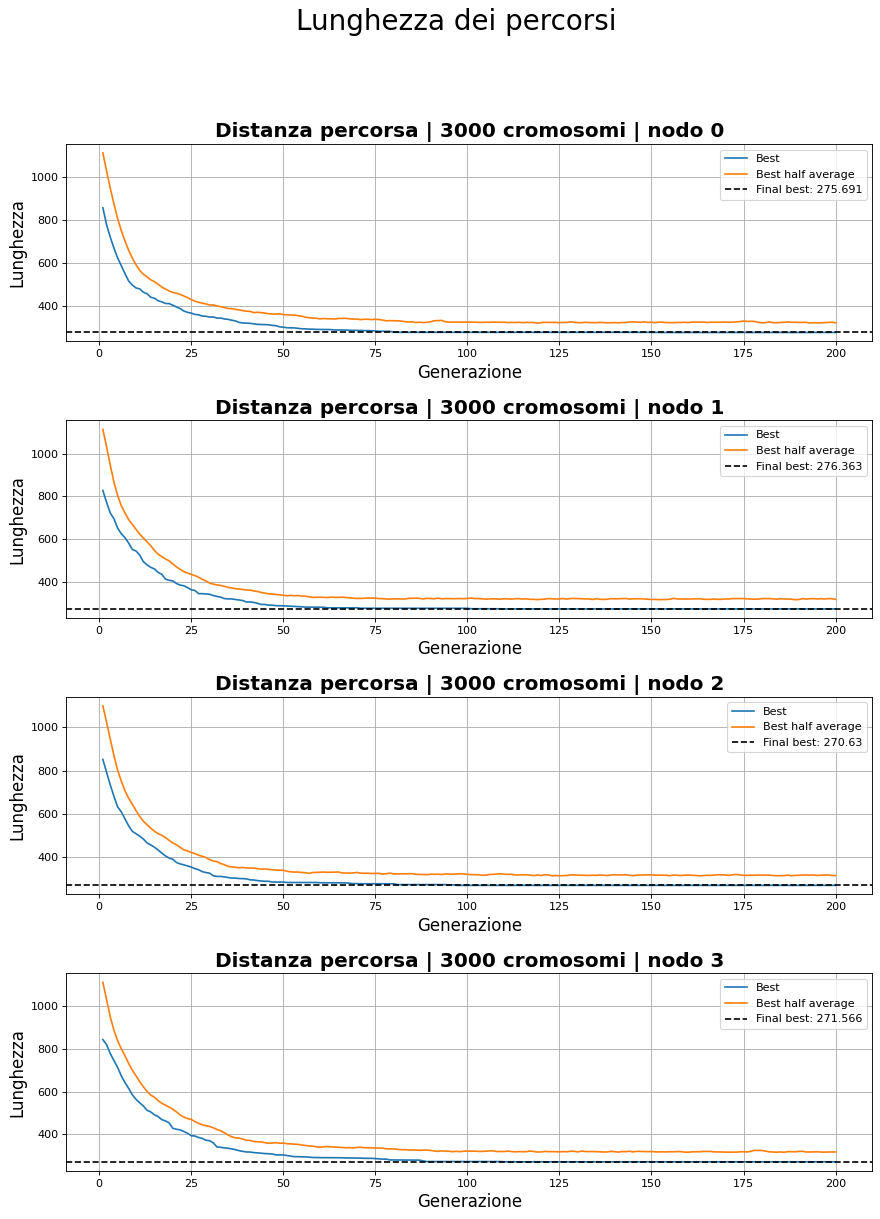

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

figure(figsize=(13, 17), dpi=80)
plt.suptitle("Lunghezza dei percorsi\n", fontsize = 25)

proc_index = ['0', '1', '2', '3']

for i in range (0,4):
    
    plt.subplot(4,1,i+1)
    # using indivs[i] individuals per generation
    gen,best = np.loadtxt("c++/output/NoMigrations/Output.BestFitness"+proc_index[i]+".txt", usecols=(0,1), unpack='true')
    plt.plot(gen, best, marker = "", label = "Best") 
    bestave = np.loadtxt("c++/output/NoMigrations/Output.BestAvFitness"+proc_index[i]+".txt", usecols=(1), unpack='true')
    plt.plot(gen, bestave, marker = "", label = "Best half average") 
    plt.ylabel('Lunghezza', fontsize =15)
    plt.xlabel('Generazione', fontsize =15)
    plt.grid(True)
    plt.title('Distanza percorsa | 3000 cromosomi | nodo '+proc_index[i], fontsize = 18, fontweight = "bold")
    plt.axhline(y=best[199], color = "k", linestyle = "--", label = "Final best: "+str(best[199]))
    plt.legend()

plt.subplots_adjust(hspace=0.4)
plt.show()

Vediamo che i percorsi convergono abbastanza in fretta ($\sim 80$ generazioni) al percorso che sembra il migliore. Probabilmente per farli spostare dal particolare minimo in cui si sono trovati servirebbero molte più generazioni. 

Ora vediamo invece cosa cosa succede implementando le migrazioni tra continenti diversi in termini di velocità di convergenza e di qualità della soluzione ottenuta:

### Con migrazioni

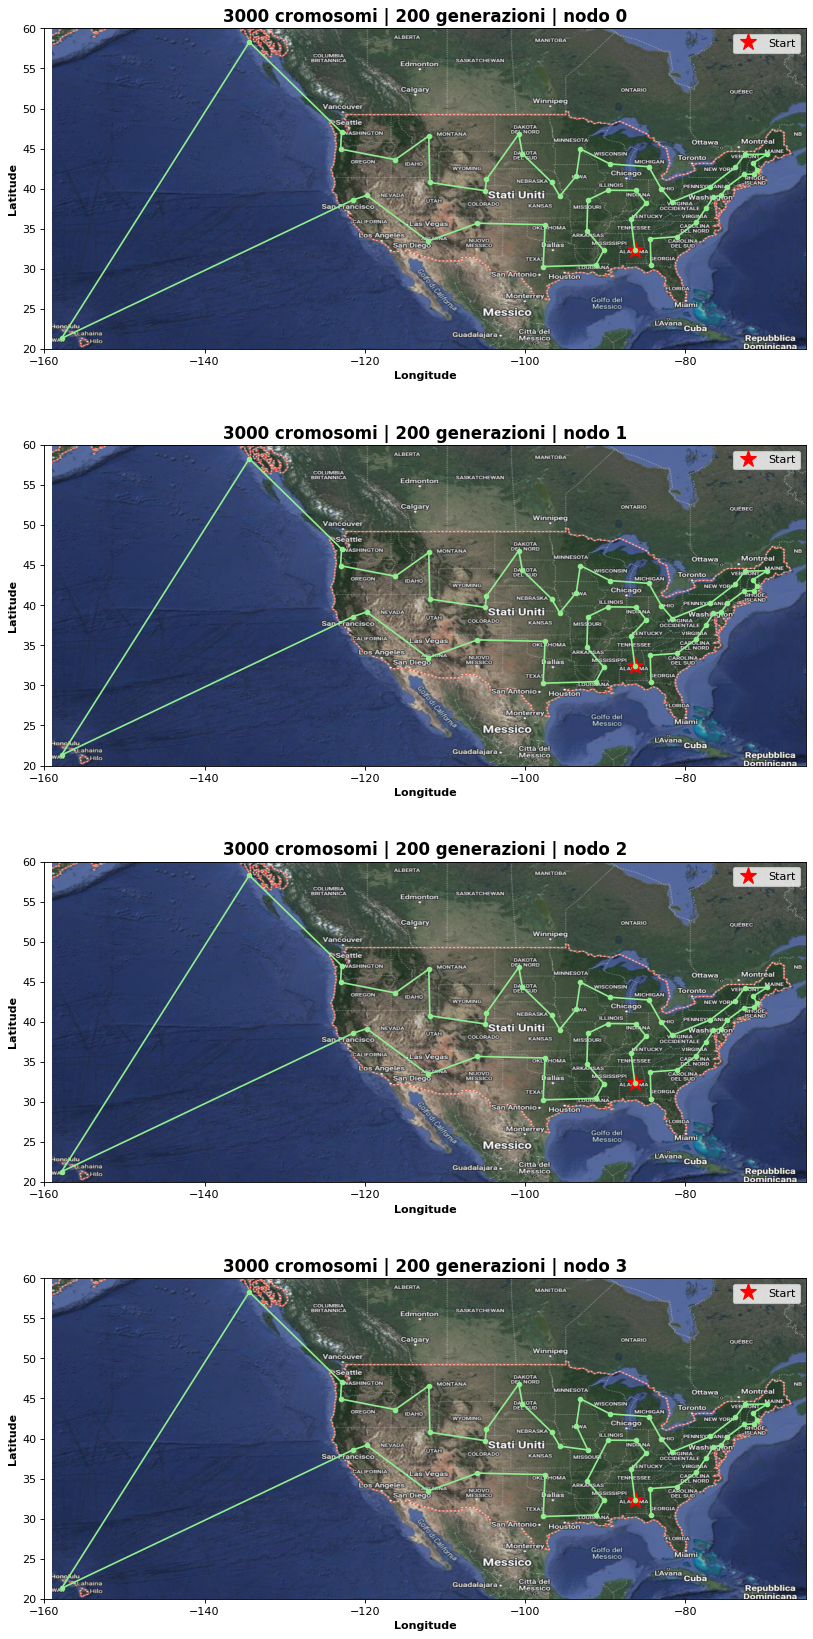

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
import matplotlib.image as mpimg


figure(figsize=(20, 26), dpi=80)

proc_index = ['0', '1', '2', '3']

for i in range (0,4):
    
    plt.subplot(4,1,i+1)
    map_img = mpimg.imread("us.png")  # Replace "us_map.png" with the path to your map image
    plt.imshow(map_img, extent=[-159, -64, 17, 65])
    x,y = np.loadtxt("c++/output/Migrations/Cities"+proc_index[i]+"/Output.gen200.txt", usecols=(0,1), unpack='true')
    plt.plot(x[0],y[0], marker ="*", color = "red", markersize = 16, label = "Start", linestyle = "")
    plt.plot(x, y, marker = "o",color="lightgreen", markersize = 4, linestyle = "-")
    plt.ylabel('Latitude', fontsize = 10, fontweight = "bold")
    plt.xlabel('Longitude', fontsize = 10, fontweight = "bold")
    plt.title('3000 cromosomi | 200 generazioni | nodo '+proc_index[i], fontsize = 15, fontweight = "bold")
    plt.legend()

    rectangle = plt.Rectangle((0,0), 1, 1, fc='r', alpha = 0.15)
    plt.gca().add_patch(rectangle)

    plt.xlim(-160, -65)
    plt.ylim(20, 60)
    plt.gca().set_aspect('equal', adjustable='box')

plt.subplots_adjust(hspace=0.3)
plt.show()

Notiamo che i primi tre percorsi sono tra di loro identici, le migrazioni hanno per ora tolto "varietà" alle soluzioni del problema.

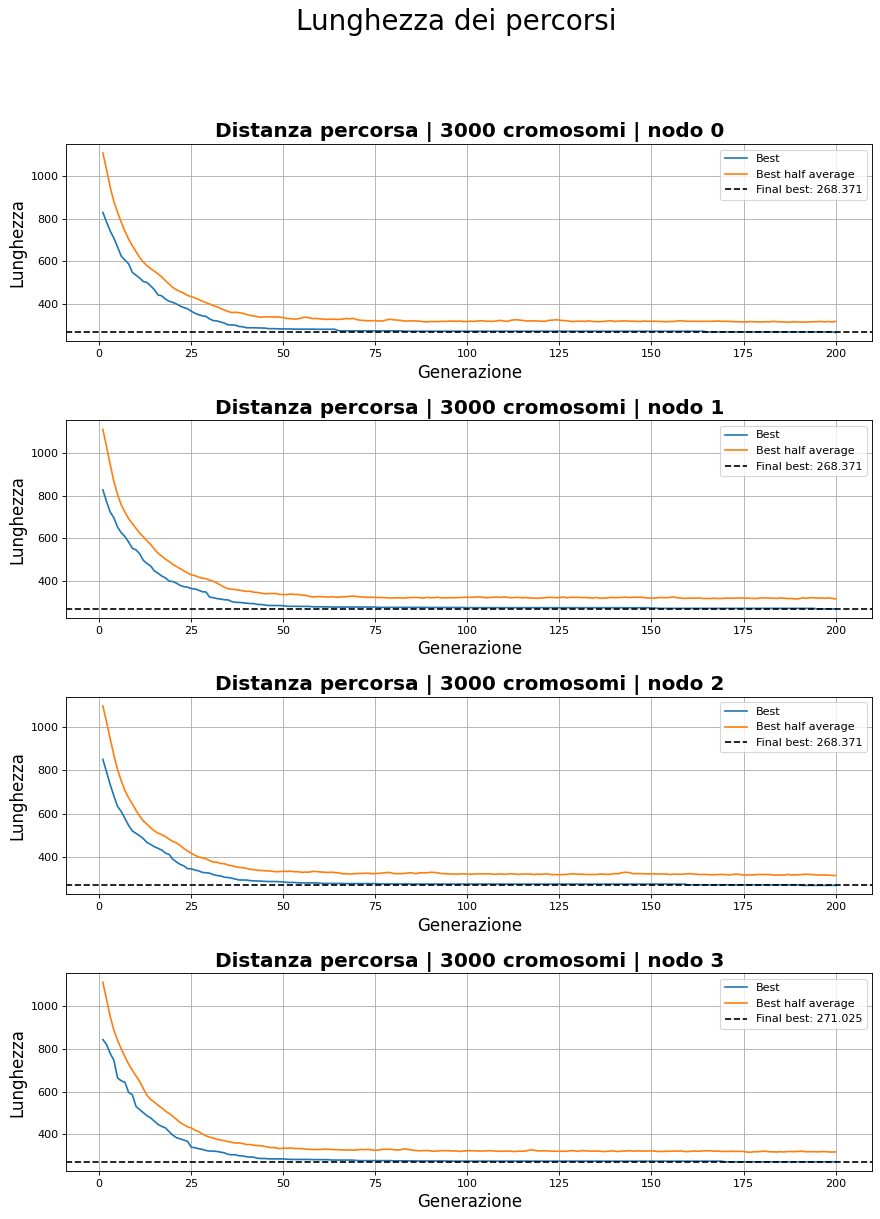

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

figure(figsize=(13, 17), dpi=80)
plt.suptitle("Lunghezza dei percorsi\n", fontsize = 25)

proc_index = ['0', '1', '2', '3']

for i in range (0,4):
    
    plt.subplot(4,1,i+1)
    # using indivs[i] individuals per generation
    gen,best = np.loadtxt("c++/output/Migrations/Output.BestFitness"+proc_index[i]+".txt", usecols=(0,1), unpack='true')
    plt.plot(gen, best, marker = "", label = "Best") 
    bestave = np.loadtxt("c++/output/Migrations/Output.BestAvFitness"+proc_index[i]+".txt", usecols=(1), unpack='true')
    plt.plot(gen, bestave, marker = "", label = "Best half average") 
    plt.ylabel('Lunghezza', fontsize =15)
    plt.xlabel('Generazione', fontsize =15)
    plt.grid(True)
    plt.title('Distanza percorsa | 3000 cromosomi | nodo '+proc_index[i], fontsize = 18, fontweight = "bold")
    plt.axhline(y=best[199], color = "k", linestyle = "--", label = "Final best: "+str(best[199]))
    plt.legend()

plt.subplots_adjust(hspace=0.4)
plt.show()

Analizzando la fitness notiamo però che la perdita di varietà è dovuta solo al fatto che le migrazioni hanno portato tre continenti su quattro verso una soluzione sensibilmente migliore rispetto a quelle ottenute senza migrazioni. La velocità di convergenza è rimasta pressochè identica al caso senza migrazioni. Questo può essere spiegato rendendosi conto del fatto che il tempo di convergenza è dato in prima approssimazione dalla complessità del problema e dalla configurazione iniziale da cui si parte. Le migrazioni invece sembrano aiutare maggiormente quando ormai si è già in configurazioni con buona fitness, migliorandola ancora di qualche punto.